In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def roc(outcomes, predictions):
    plt.rcParams['figure.figsize'] = [3, 3]
    fpr, tpr, _ = roc_curve(outcomes, predictions)
    plt.plot(fpr, tpr, label='AUC = %0.3f' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    del fpr, tpr, _

In [4]:
d = pd.read_csv('data/scores.txt', sep='\t')

In [ ]:
RANDOM_SEED = 123
y = d['Class']
y = y.replace(2,1)
x = d.drop(['Accession', 'Class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_imp = pd.Series(rf.feature_importances_,index=list(x)).sort_values(ascending=False)

In [ ]:
%matplotlib inline
# Creating a bar plot
plt.rcParams['figure.figsize'] = [10, 20]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
instance = d[:1].drop(['Accession', 'Class'], axis=1)

In [ ]:
print(rf.predict_proba(instance))

In [ ]:
prediction, bias, contributions = ti.predict(rf, instance)
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0], list(x)):
    print(feature, c)

In [5]:
#5 features
RANDOM_SEED = 123
y = d['Class']
y = y.replace(2,1)
x = d[['openen','STR','CAI_HEG','GC','rrf_5S_RNA']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
# %%timeit
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
feature_imp = pd.Series(rf.feature_importances_,index=list(x)).sort_values(ascending=False)

Accuracy: 0.8161893629456458


No handles with labels found to put in legend.


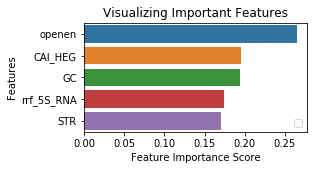

In [7]:
%matplotlib inline
# Creating a bar plot
plt.rcParams['figure.figsize'] = [4, 2]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [8]:
y_pred_rf = rf.predict_proba(x_test)[:, 1]

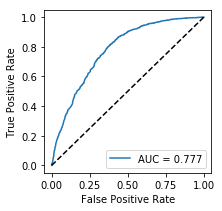

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [3, 3]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr_rf, tpr_rf, label='AUC = %0.3f' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
instance = x[:1]
prediction, bias, contributions = ti.predict(rf, instance)
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0], list(x)):
    print(feature, c)

In [5]:
#complete dataset for full model
# d = pd.read_csv('data/scores.txt', sep='\t')
d = pd.read_csv('data/scores.txt.old', sep='\t')
y = d['Class']
y = y.replace(2,1)
# x = d[['openen','STR','CAI_HEG','GC','rrf_5S_RNA']]
x = d[['openen43','STR','CAI_HEG','GC','rrf_5S_RNA']]

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x, y)
feature_imp = pd.Series(rf.feature_importances_,index=list(x)).sort_values(ascending=False)

In [ ]:
filename = 'rf_expr.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict_proba(instance)
result = loaded_model.score(x_test, y_test)
print(result)

ECD_RS01035_16S_RNA


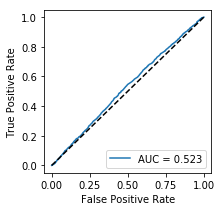

ECD_RS01040_tRNA.Ile_GAT


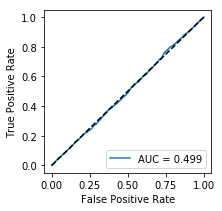

ECD_RS01045_tRNA.Ala_TGC


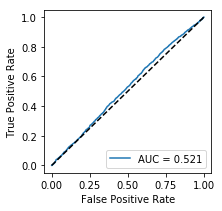

ECD_RS01060_tRNA.Asp_GTC


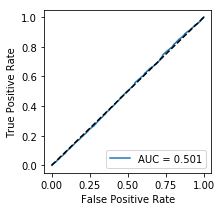

ECD_RS01260_tRNA.Thr_CGT


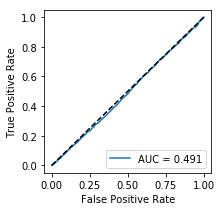

ECD_RS02525_tRNA.Arg_TCT


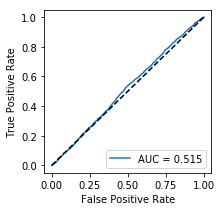

ECD_RS03195_tRNA.Gln


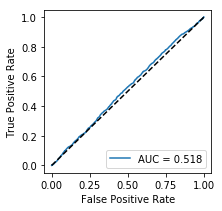

ECD_RS03210_tRNA.Gln


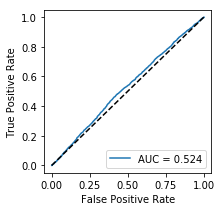

ECD_RS03220_tRNA.Leu


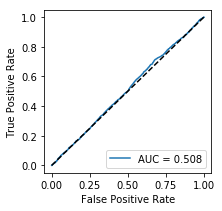

ECD_RS03225_tRNA.Met


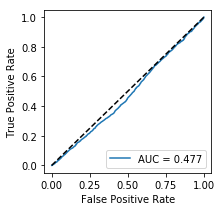

ECD_RS03620_tRNA.Lys_TTT


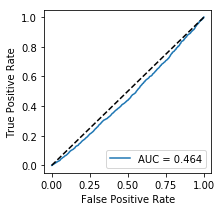

ECD_RS03625_tRNA.Val_TAC


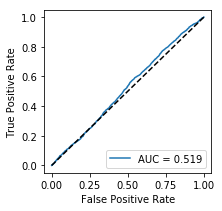

ECD_RS04720_tRNA.Ser


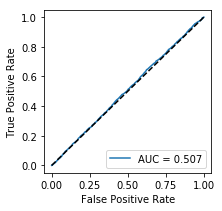

ECD_RS05175_tRNA.Ser


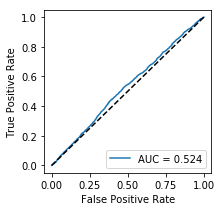

ECD_RS06440_tRNA.Tyr


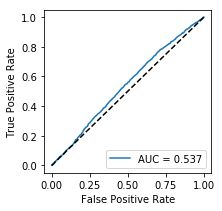

ECD_RS08580_tRNA.Val_GAC


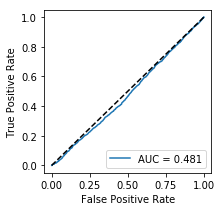

ECD_RS08585_tRNA.Val_GAC


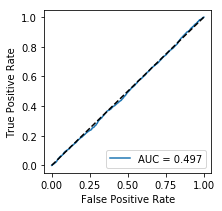

ECD_RS09870_tRNA.Leu


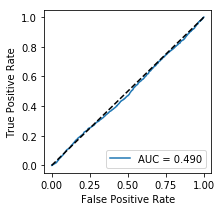

ECD_RS09875_tRNA.Cys


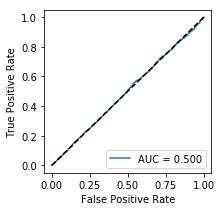

ECD_RS09950_tRNA.Ser


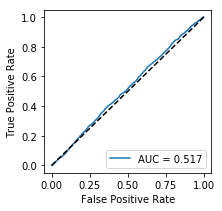

ECD_RS09960_tRNA.Asn_GTT


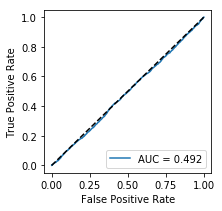

ECD_RS10990_tRNA.Pro_GGG


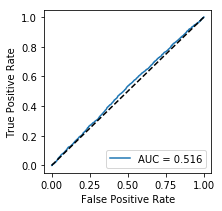

ECD_RS11785_tRNA.Arg_CCT


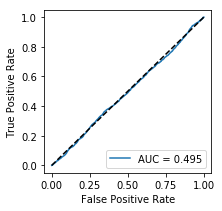

ECD_RS11950_tRNA.Ala


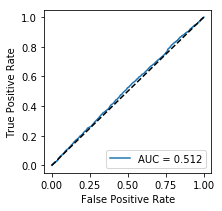

ECD_RS13280_tRNA.Arg


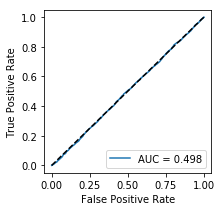

ECD_RS13285_tRNA.Ser


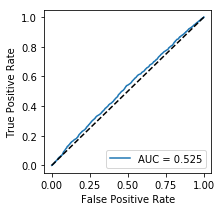

ECD_RS13895_tRNA.Met_CAT


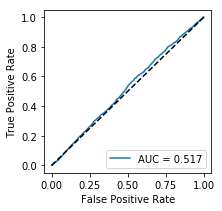

ECD_RS14100_tRNA.Gly


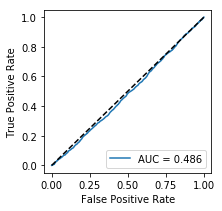

ECD_RS15305_tRNA.Met_CAT


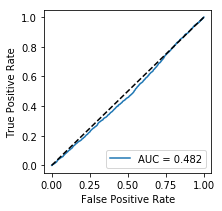

ECD_RS15830_tRNA.Leu


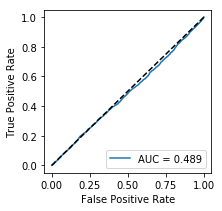

ECD_RS16315_tRNA.Thr


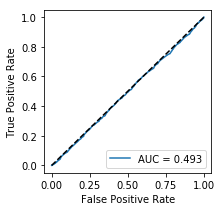

ECD_RS17750_tRNA.Pro


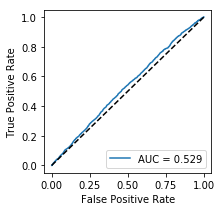

ECD_RS18370_tRNA.Sec


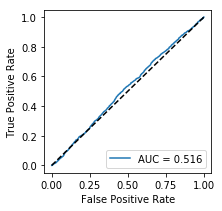

ECD_RS19040_tRNA.Trp_CCA


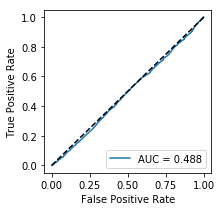

ECD_RS19210_tRNA.Arg_CCG


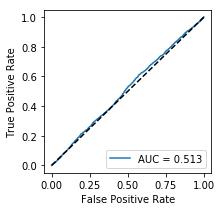

ECD_RS19215_tRNA.His_GTG


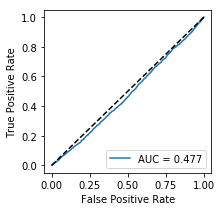

ECD_RS19220_tRNA.Leu_CAG


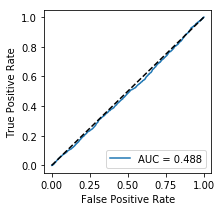

ECD_RS19225_tRNA.Pro_TGG


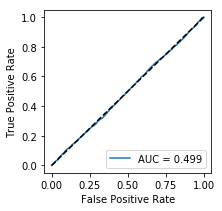

ECD_RS20240_tRNA.Thr_TGT


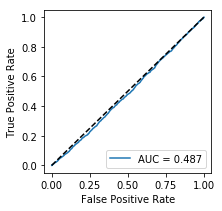

ECD_RS20245_tRNA.Tyr_GTA


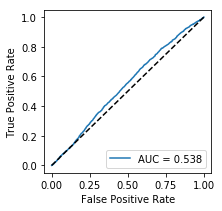

ECD_RS20250_tRNA.Gly_TCC


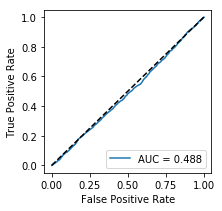

ECD_RS20255_tRNA.Thr_GGT


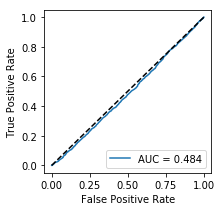

ECD_RS20405_tRNA.Glu_TTC


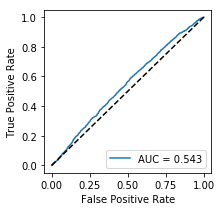

ECD_RS21090_tRNA.Phe


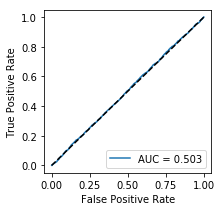

ECD_RS21235_tRNA.Gly_GCC


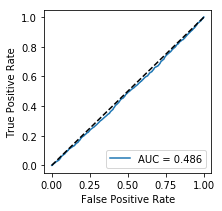

ECD_RS21775_tRNA.Leu_CAA


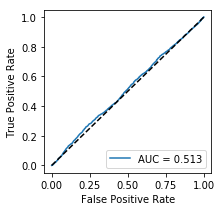

ECD_RS22410_tRNA.Leu


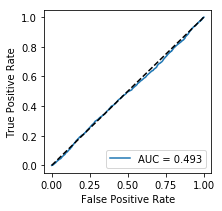

ECD_RS22735_ssrA


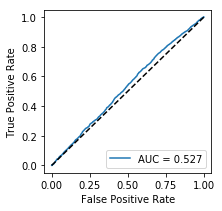

G7387_ileY


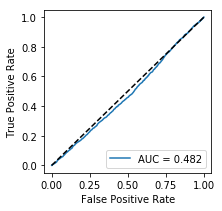

ffs_srp


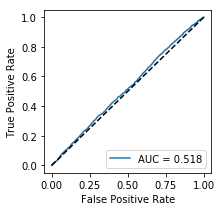

rnpB_RNase_P_A


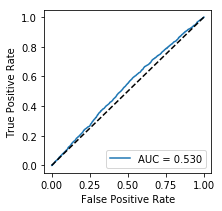

rrf_5S_RNA


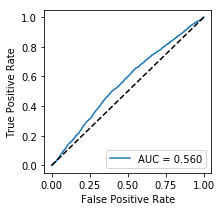

ssrS_6S_RNA


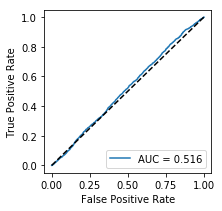

ECD_RS16325_23S_RNA


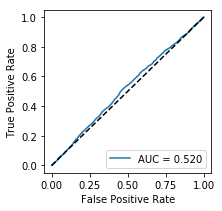

GC3C


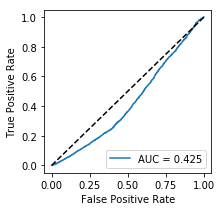

CAI_HEG


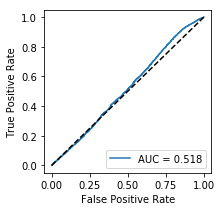

Biosynthetic_cost


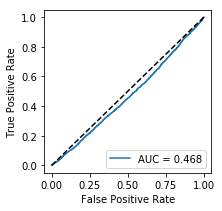

T3s


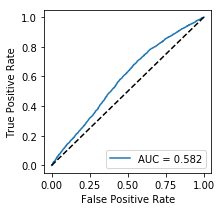

C3s


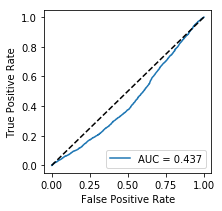

A3s


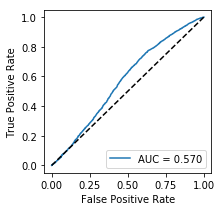

G3s


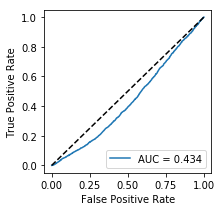

CAI


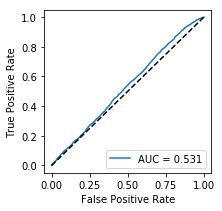

Nc


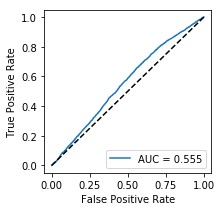

GC3s


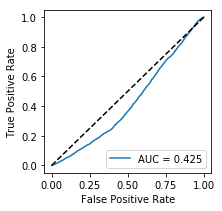

GC


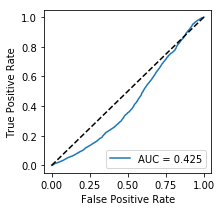

L_sym


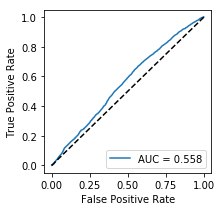

L_aa


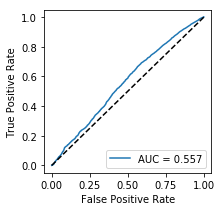

Gravy


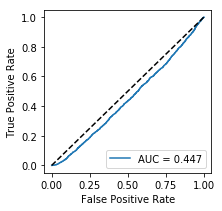

Aromo


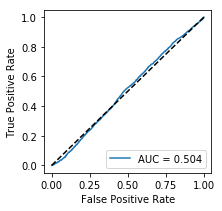

openen43


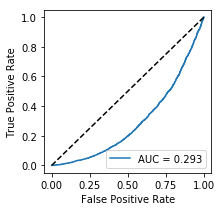

STR


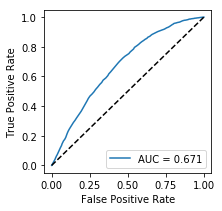

C1


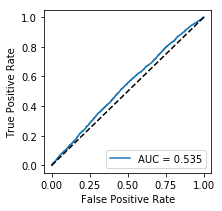

C3


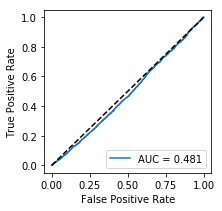

length


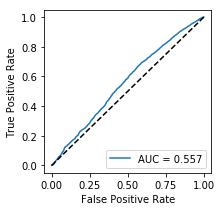

Class


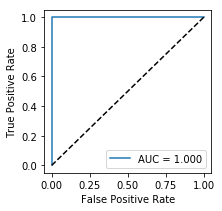

In [6]:
for i in list(d)[1:]:
    print(i)
    roc(y,d[i])

In [ ]:
y_pred_rf = rf.predict_proba(x)[:, 1]

In [ ]:
#shine-dalgarno-like
d = pd.read_csv('avoidance_16S_30.out', sep='\t')
s = pd.read_csv('data/scores.txt', sep='\t')

In [ ]:
d = pd.merge(d, s, on='Accession')

In [ ]:
y = d['Class']
y = y.replace(2,1)

In [ ]:
roc(y, -d['Three_Prime_16S'])

In [ ]:
var_corr = x.corr()
plt.rcParams['figure.figsize'] = [50, 50]
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)

In [62]:
#yeast dnasu pSGP
def roc(outcomes, predictions, i):
    plt.rcParams['figure.figsize'] = [4.5, 4.5]
    sns.set(font_scale=1.5)
    sns.set_style("ticks")
    fpr, tpr, _ = roc_curve(outcomes, predictions, pos_label=1)
    plt.plot(fpr, tpr, label='%s (%0.2f)' % (i, auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.legend(loc="lower right")
    plt.savefig('%s.pdf' % i)
    plt.close()
    del fpr, tpr, _

In [3]:
d = pd.read_csv('data/scores.pSGP.txt', sep='\t')
d.columns = ['Accession', 'CAI', 'Opening energy', 'Folding energy', 'G+C (%)', 'iXnos', 'Class']

CAI


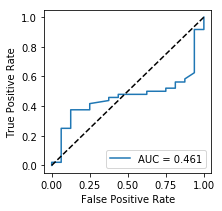

Opening energy


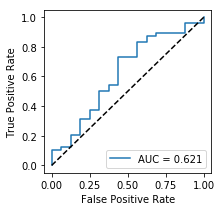

Folding energy


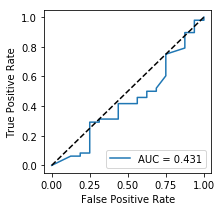

G+C (%)


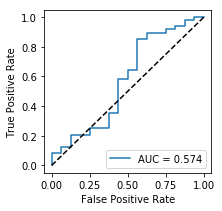

iXnos


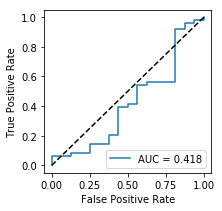

Class


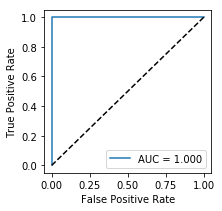

In [6]:
for i in list(d)[1:]:
    print(i)
    roc(d['Class'],d[i])

In [7]:
%config InlineBackend.figure_format = 'pdf'
plt.rcParams['figure.figsize'] = [4.5, 4.5]
sns.set(font_scale=1.5)
sns.set_style("ticks")
fpr, tpr, _ = roc_curve(d['Class'], -d['CAI'])
plt.plot(fpr, tpr, label='%s (%0.2f)' % ('CAI', auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="lower right")
plt.savefig('test.pdf')

<Figure size 324x324 with 1 Axes>